In [100]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [96]:
dataArray = [
    [43,99],
    [21, 65],
    [25,79],
    [42,75],
    [57,87],
    [59,81]
]
df = pd.DataFrame(dataArray,columns=['X','Y'])

In [98]:
df = df.assign(XxY= lambda x: x.X * x.Y)
df = df.assign(XxX= lambda x: x.X * x.X)
df = df.assign(YxY= lambda x: x.Y * x.Y)

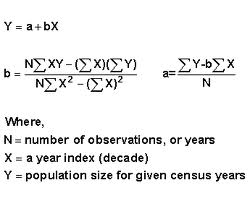

In [93]:
# Calculates slope (b)
def calcSlope(n_items,sum_of_x, sum_of_y, sum_of_xy, sum_of_x2):
    numerator = (n_items * sum_of_xy) - (sum_of_x * sum_of_y)
    denominator = (n_items*sum_of_x2) - (sum_of_x*sum_of_x)
    return numerator / denominator

# Calculates Y-intercept (a)
def calcIntercept(n_items,sum_of_x, sum_of_y, sum_of_xy, sum_of_x2):
    numerator = (sum_of_y * sum_of_x2) - (sum_of_x * sum_of_xy)
    denominator = (n_items*sum_of_x2) - (sum_of_x*sum_of_x)
    return numerator / denominator
# Linear regression (y` = a + bx) where y is regression value, a is intercept & b is slope
# regression = intercept + slope * x
def regression(x, slope, intercept):
    return intercept + (slope * x)

In [99]:
sum_of_x = df['X'].sum()
sum_of_y = df['Y'].sum()
sum_of_xy = df['XxY'].sum()
sum_of_x2 = df['XxX'].sum()
slope = calcSlope(len(df),sum_of_x,sum_of_y,sum_of_xy,sum_of_x2)
intercept = calcIntercept(len(df),sum_of_x,sum_of_y,sum_of_xy,sum_of_x2)
df = df.assign(RL= lambda x: regression(x.X,slope, intercept))

In [92]:
df

,Age,Glucose,AgeXGlu,XxX,YxY,RL
0,43,99,4257,1849,9801,81.706246
1,21,65,1365,441,4225,73.231296
2,25,79,1975,625,6241,74.772196
3,42,75,3150,1764,5625,81.321021
4,57,87,4959,3249,7569,87.099396
5,59,81,4779,3481,6561,87.869846


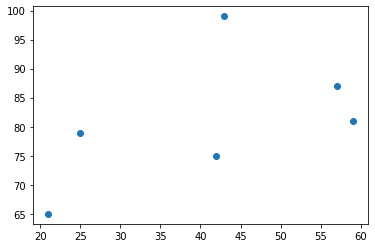

In [101]:
plt.scatter(df.X, df.Y)
plt.show()